In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import warnings
warnings.simplefilter("ignore")

In [35]:
df = pd.read_csv(r"data\raw\ChipShot\Jordan\3.csv", header=[3, 4])
df.columns = pd.MultiIndex.from_tuples(
[(c[0].split('(')[0].strip(), c[1].strip()) for c in df.columns])
df

Hamstrings right             Rectus Femoris right             \
     EMG 1 Time Series (s) EMG 1 (mV) EMG 1 Time Series (s) EMG 1 (mV)   
0                 0.000000  -0.015610              0.000000   0.026184   
1                 0.000465  -0.018967              0.000465   0.024506   
2                 0.000931  -0.019638              0.000931   0.022324   
3                 0.001397  -0.015610              0.001397   0.018296   
4                 0.001862  -0.008896              0.001862   0.015274   
...                    ...        ...                   ...        ...   
6433              2.994672  -0.028366              2.994672   0.018631   
6434              2.995138  -0.029038              2.995138   0.017288   
6435              2.995603  -0.027863              2.995603   0.018631   
6436              2.996069  -0.025681              2.996069   0.019303   
6437              2.996535  -0.025010              2.996535   0.019303   

        Gastrocnemius left            TibilaisÂ Anterior right             \
     EMG 1 Time Series (s) EMG 1 (mV)    EMG 1 Time Series (s) EMG 1 (mV)   
0                 0.000000  -0.045823                 0.000000  -0.026352   
1                 0.000465  -0.044648                 0.000465  -0.013596   
2                 0.000931  -0.043137                 0.000931  -0.002853   
3                 0.001397  -0.039780                 0.001397   0.000504   
4                 0.001862  -0.033738                 0.001862   0.001679   
...                    ...        ...                      ...        ...   
6433              2.994672  -0.024674                 2.994672  -0.016281   
6434              2.995138  -0.022995                 2.995138  -0.017121   
6435              2.995603  -0.022995                 2.995603  -0.016449   
6436              2.996069  -0.024338                 2.996069  -0.014771   
6437              2.996535  -0.026017                 2.996535  -0.013092   

           Hamstrings left            TibilaisÂ Anterior left             \
     EMG 1 Time Series (s) EMG 1 (mV)   EMG 1 Time Series (s) EMG 1 (mV)   
0                 0.000000   0.093828                0.000000  -0.005203   
1                 0.000465   0.020646                0.000465  -0.023667   
2                 0.000931  -0.055222                0.000931  -0.040452   
3                 0.001397  -0.108599                0.001397  -0.034577   
4                 0.001862  -0.138140                0.001862  -0.009567   
...                    ...        ...                     ...        ...   
6433              2.994672  -0.005875                2.994672  -0.012924   
6434              2.995138  -0.006210                2.995138  -0.013596   
6435              2.995603  -0.004196                2.995603  -0.012421   
6436              2.996069  -0.003693                2.996069  -0.010575   
6437              2.996535  -0.004532                2.996535  -0.010910   

       Rectus Femoris left              Gastrocnemius right             
     EMG 1 Time Series (s) EMG 1 (mV) EMG 1 Time Series (s) EMG 1 (mV)  
0                 0.000000  -0.015946              0.000000   0.018631  
1                 0.000465  -0.014939              0.000465   0.009064  
2                 0.000931  -0.014267              0.000931   0.003861  
3                 0.001397  -0.015610              0.001397   0.003525  
4                 0.001862  -0.016617              0.001862   0.003525  
...                    ...        ...                   ...        ...  
6433              2.994672  -0.005875              2.994672  -0.002182  
6434              2.995138  -0.006210              2.995138  -0.004196  
6435              2.995603  -0.005539              2.995603  -0.008225  
6436              2.996069  -0.004196              2.996069  -0.011246  
6437              2.996535  -0.003861              2.996535  -0.011078  

[6438 rows x 16 columns]

In [36]:
time_col = df.iloc[:, 0] 
# We extract only the columns containing 'mV' (the EMG data)
emg_data = df.xs('EMG 1 (mV)', level=1, axis=1).copy()
emg_data.insert(0, 'Time', time_col)

In [37]:
emg_data

,Time,Hamstrings right,Rectus Femoris right,Gastrocnemius left,TibilaisÂ Anterior right,Hamstrings left,TibilaisÂ Anterior left,Rectus Femoris left,Gastrocnemius right
0,0.000000,-0.015610,0.026184,-0.045823,-0.026352,0.093828,-0.005203,-0.015946,0.018631
1,0.000465,-0.018967,0.024506,-0.044648,-0.013596,0.020646,-0.023667,-0.014939,0.009064
2,0.000931,-0.019638,0.022324,-0.043137,-0.002853,-0.055222,-0.040452,-0.014267,0.003861
3,0.001397,-0.015610,0.018296,-0.039780,0.000504,-0.108599,-0.034577,-0.015610,0.003525
4,0.001862,-0.008896,0.015274,-0.033738,0.001679,-0.138140,-0.009567,-0.016617,0.003525
...,...,...,...,...,...,...,...,...,...
6433,2.994672,-0.028366,0.018631,-0.024674,-0.016281,-0.005875,-0.012924,-0.005875,-0.002182
6434,2.995138,-0.029038,0.017288,-0.022995,-0.017121,-0.006210,-0.013596,-0.006210,-0.004196
6435,2.995603,-0.027863,0.018631,-0.022995,-0.016449,-0.004196,-0.012421,-0.005539,-0.008225
6436,2.996069,-0.025681,0.019303,-0.024338,-0.014771,-0.003693,-0.010575,-0.004196,-0.011246


In [38]:
target_order = [
    'Time', 
    'Rectus Femoris right', 'Rectus Femoris left', 
    'Hamstrings right', 'Hamstrings left', 
    'TibilaisÂ Anterior right', 'TibilaisÂ Anterior left', 
    'Gastrocnemius right', 'Gastrocnemius left'
]
emg_data = emg_data.reindex(columns=target_order)
emg_data

,Time,Rectus Femoris right,Rectus Femoris left,Hamstrings right,Hamstrings left,TibilaisÂ Anterior right,TibilaisÂ Anterior left,Gastrocnemius right,Gastrocnemius left
0,0.000000,0.026184,-0.015946,-0.015610,0.093828,-0.026352,-0.005203,0.018631,-0.045823
1,0.000465,0.024506,-0.014939,-0.018967,0.020646,-0.013596,-0.023667,0.009064,-0.044648
2,0.000931,0.022324,-0.014267,-0.019638,-0.055222,-0.002853,-0.040452,0.003861,-0.043137
3,0.001397,0.018296,-0.015610,-0.015610,-0.108599,0.000504,-0.034577,0.003525,-0.039780
4,0.001862,0.015274,-0.016617,-0.008896,-0.138140,0.001679,-0.009567,0.003525,-0.033738
...,...,...,...,...,...,...,...,...,...
6433,2.994672,0.018631,-0.005875,-0.028366,-0.005875,-0.016281,-0.012924,-0.002182,-0.024674
6434,2.995138,0.017288,-0.006210,-0.029038,-0.006210,-0.017121,-0.013596,-0.004196,-0.022995
6435,2.995603,0.018631,-0.005539,-0.027863,-0.004196,-0.016449,-0.012421,-0.008225,-0.022995
6436,2.996069,0.019303,-0.004196,-0.025681,-0.003693,-0.014771,-0.010575,-0.011246,-0.024338


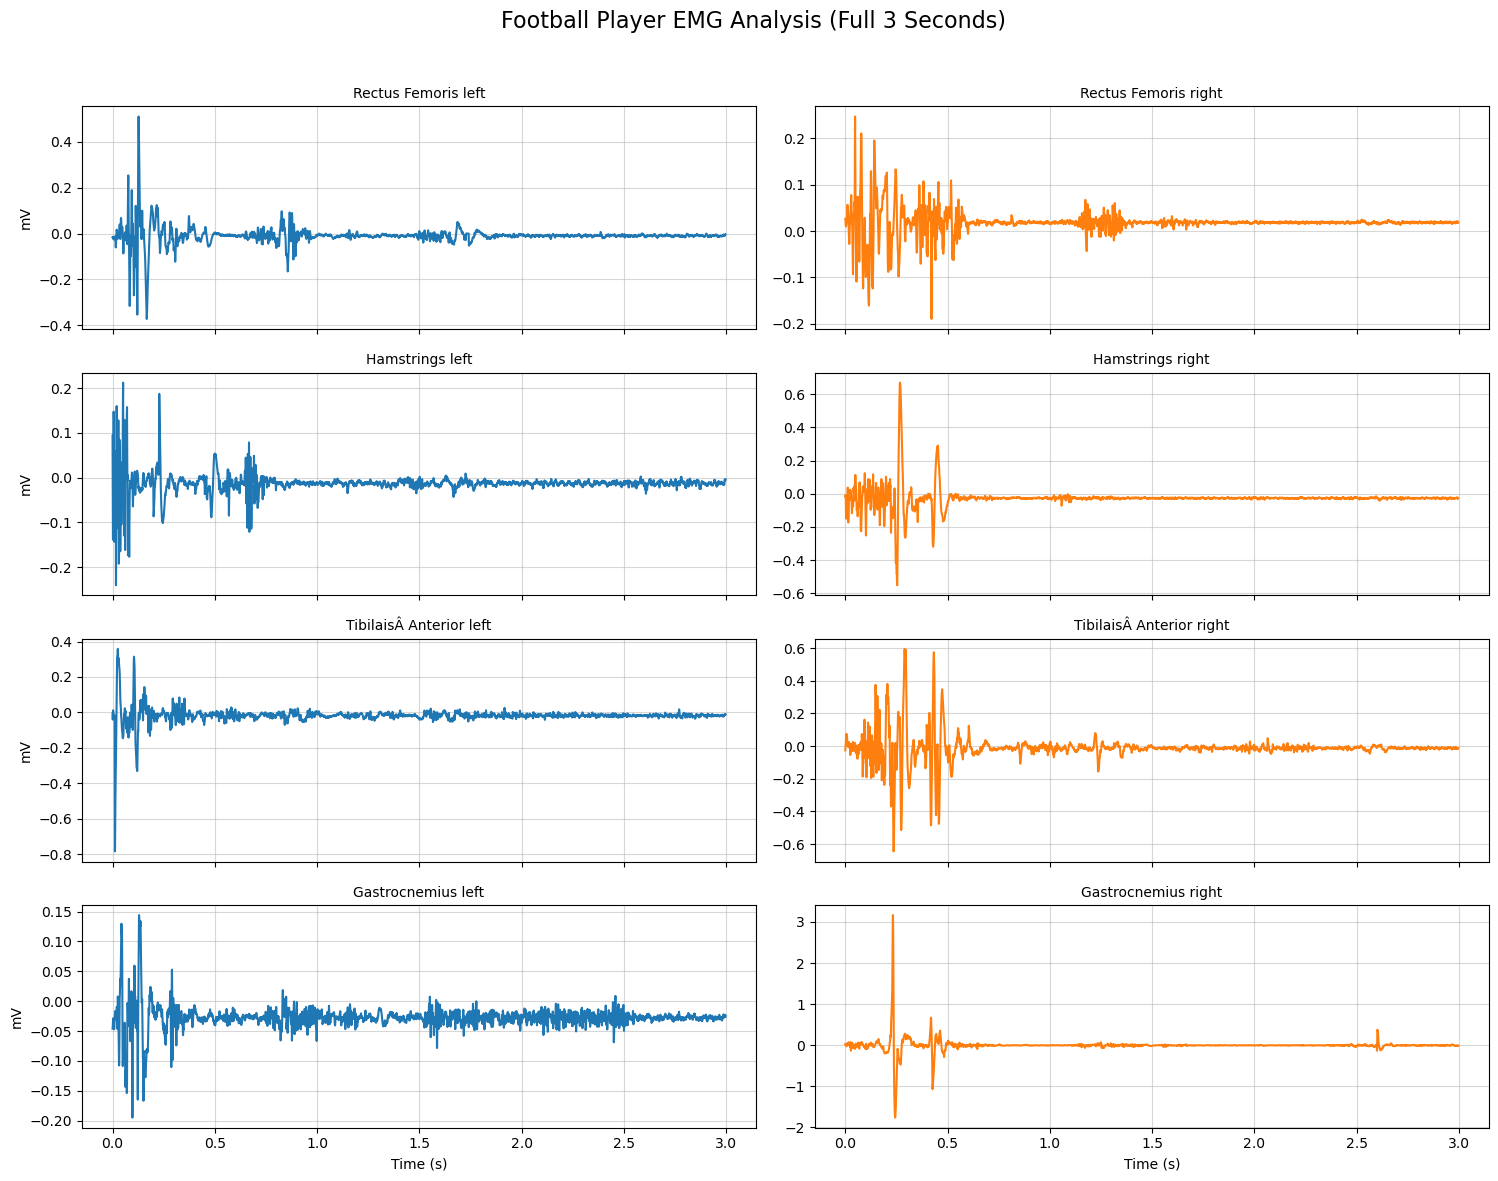

In [39]:
# Initialize the figure with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)
fig.suptitle('Football Player EMG Analysis (Full 3 Seconds)', fontsize=16)

# Define the list of muscles to look for
muscle_types = ['Rectus Femoris', 'Hamstrings', 'TibilaisÂ Anterior', 'Gastrocnemius']

for i, m_type in enumerate(muscle_types):
    # Dynamic Column Search:
    # Find columns that match the muscle name AND the side (left/right)
    # We filter 'emg_data.columns' to exclude 'Time' so the search doesn't crash
    cols_to_search = [c for c in emg_data.columns if c != 'Time Frame']
    
    # Get the exact column name for the Left and Right version of the current muscle
    left_col = [c for c in cols_to_search if m_type in c and 'left' in c][0]
    right_col = [c for c in cols_to_search if m_type in c and 'right' in c][0]

    # --- Plot Left Leg (Left Column: axis [i, 0]) ---
    axes[i, 0].plot(emg_data['Time'], emg_data[left_col], color='#1f77b4') # Blue color
    axes[i, 0].set_title(left_col, fontsize=10)
    axes[i, 0].grid(True, alpha=0.5)
    axes[i, 0].set_ylabel('mV')

    # --- Plot Right Leg (Right Column: axis [i, 1]) ---
    axes[i, 1].plot(emg_data['Time'], emg_data[right_col], color='#ff7f0e') # Orange color
    axes[i, 1].set_title(right_col, fontsize=10)
    axes[i, 1].grid(True, alpha=0.5)

# Set X-axis labels only on the bottom row
axes[3, 0].set_xlabel('Time (s)')
axes[3, 1].set_xlabel('Time (s)')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [40]:
emg_data.to_csv(r"data\processed\ChipShot_Jordan_3.csv", index=1)